In [45]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

In [46]:
#Modify the original files to get daily cases instead of cumulative numbers.


#Confirmed cases df. Confirmed cases include deaths and recoveries.
#Read csv
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
#Create Status field
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

#Create a table of daily confirmed cases
confirmedByday=confirmed_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        confirmedByday.iloc[j,i]=confirmedByday.iloc[j,i]-confirmedByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40


#Death cases
#Read csv
deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
#Create Status field
deaths_df["Status"] = deaths_df.loc[:,'Status'] = 'Deaths'

##Create a table of daily death cases
deathsByday=deaths_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        deathsByday.iloc[j,i]=deathsByday.iloc[j,i]-deathsByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

    
#Recovered cases
#Read csv
recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
#Create Status field
recovered_df["Status"] = recovered_df.loc[:,'Status'] = 'Recovered'

#Create a table of daily recovered cases
recoveredByday=recovered_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        recoveredByday.iloc[j,i]=recoveredByday.iloc[j,i]-recoveredByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

# Acumulated data:
#  recovered_df
#  deaths_df
#  confirmed_df

# Daily data:
#  recoveredByday
#  deathsByday
#  confirmedByday

In [47]:
#Here we will append all 3 acumulated dfs into one
combined_data = pd.concat([confirmed_df, deaths_df, recovered_df])
combined_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,990,990,990,990,990,990,990,Confirmed
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,400,410,410,411,413,414,414,418,418,Confirmed
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,Confirmed
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,294,296,296,296,296,296,296,296,296,Confirmed
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,102,Confirmed


In [48]:
#Transpose the data to put days and cases into rows rather than having them by columns.
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Original Date', value_name='Cases')
transposed_df.head()

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0


In [49]:
#Create a new field to have a Date format out of the Original Date that is a string.
transposed_df['Date']  = pd.to_datetime(transposed_df['Original Date'])
transposed_df

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases,Date
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1,2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14,2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6,2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1,2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0,2020-01-22
...,...,...,...,...,...,...,...,...
22831,"Fort Bend County, TX",US,29.5693,-95.8143,Recovered,3/5/20,0,2020-03-05
22832,"Grant County, WA",US,47.1981,-119.3732,Recovered,3/5/20,0,2020-03-05
22833,"Queens County, NY",US,40.7282,-73.7949,Recovered,3/5/20,0,2020-03-05
22834,"Santa Rosa County, FL",US,30.7690,-86.9824,Recovered,3/5/20,0,2020-03-05


In [54]:
#Group by to show sum of cases by Status, Country/Reguion and Date
grouped_df = transposed_df.groupby(['Status','Country/Region','Date'])

#Sum of cases variable
cases = grouped_df['Cases'].sum()

#Create new df
summary_df = pd.DataFrame({"Cases": cases})

#Reset index to be able to be able to filter by the grouped by fields.
summary_df = summary_df.reset_index()

#Create a china specific df that looks at Confirmed cases only in Mainland China
china_df = summary_df.loc[(summary_df["Status"] == "Confirmed") & 
            (summary_df["Country/Region"] == "Mainland China"),:]

#Add percent change variable to the china df
china_df['% Growth'] = china_df['Cases'].pct_change() #* 100

#Change format of % Growth to percentage
#china_df['% Growth'] = china_df['% Growth'].map("{:.2f}%".format)

###

#row = rest of world
#Create a 'rest of the world' specific df that looks at Confirmed cases outside of Mainland China
restofworld_filter_df = summary_df.loc[(summary_df["Status"] == "Confirmed") & 
                        (summary_df["Country/Region"] != "Mainland China"),:]

#Group by to remove the "Country/Region" granularity.
restofworld_grouped_df = restofworld_filter_df.groupby(['Status','Date'])

#Sum of cases variable
cases_row = restofworld_grouped_df['Cases'].sum()

#Create new df
restofworld_df = pd.DataFrame({"Cases": cases_row})

#Reset index to be able to be able to filter by the grouped by fields.
restofworld_df = restofworld_df.reset_index()

#Create a 'rest of the world' specific df that looks at Confirmed cases only-repeated-
restofworld_confirmed = restofworld_df.loc[restofworld_df["Status"] == "Confirmed"]

#Add percent change variable to the 'rest of the world' df
restofworld_confirmed['% Growth'] = restofworld_df['Cases'].pct_change() #* 100

#Change format of % Growth to percentage
#restofworld_confirmed['% Growth'] = restofworld_confirmed['% Growth'].map("{:.2f}%".format)

#print the 'rest of the world' df
restofworld_confirmed


C:\Users\H314424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Status,Date,Cases,% Growth
0,Confirmed,2020-01-22,8,NaN
1,Confirmed,2020-01-23,14,0.750000
2,Confirmed,2020-01-24,25,0.785714
3,Confirmed,2020-01-25,35,0.400000
4,Confirmed,2020-01-26,56,0.600000
5,Confirmed,2020-01-27,64,0.142857
6,Confirmed,2020-01-28,84,0.312500
7,Confirmed,2020-01-29,96,0.142857
8,Confirmed,2020-01-30,110,0.145833
9,Confirmed,2020-01-31,144,0.309091


In [55]:
#print the china df
china_df

,Status,Country/Region,Date,Cases,% Growth
2156,Confirmed,Mainland China,2020-01-22,547,NaN
2157,Confirmed,Mainland China,2020-01-23,639,0.168190
2158,Confirmed,Mainland China,2020-01-24,916,0.433490
2159,Confirmed,Mainland China,2020-01-25,1399,0.527293
2160,Confirmed,Mainland China,2020-01-26,2062,0.473910
2161,Confirmed,Mainland China,2020-01-27,2863,0.388458
2162,Confirmed,Mainland China,2020-01-28,5494,0.918966
2163,Confirmed,Mainland China,2020-01-29,6070,0.104842
2164,Confirmed,Mainland China,2020-01-30,8124,0.338386
2165,Confirmed,Mainland China,2020-01-31,9783,0.204210


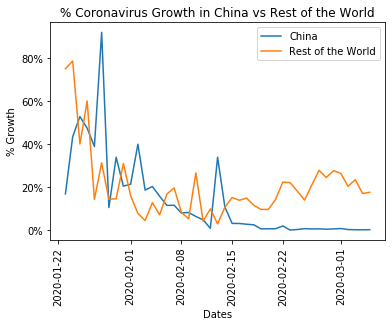

In [70]:
#Plot both china and 'rest of the world' dfs into one line chart to compare.
china_handle, = plt.plot(china_df['Date'],china_df['% Growth'], label="China")
restofworld_handle, = plt.plot(restofworld_confirmed['Date'],restofworld_confirmed['% Growth'], label="Rest of the World")
plt.legend(loc='best')

#Change format of x axis to percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#Rotate x axis labels
plt.xticks(rotation='vertical')

#
plt.title('% Coronavirus Growth in China vs Rest of the World')
plt.xlabel('Dates')
plt.ylabel('% Growth')
plt.savefig("Images/% Coronavirus Growth.png")
plt.show()